In [1]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.1/99.8 MB 812.7 kB/s eta 0:02:03
   ---------------------------------------- 0.1/99.8 MB 930.9 kB/s eta 0:01:48
   ---------------------------------------- 0.2/99.8 MB 913.1 kB/s eta 0:01:50
   ---------------------------------------- 0.2/99.8 MB 953.7 kB/s eta 0:01:45
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:31
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/99.8 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.6/99.8 MB 1.1 MB/s eta 0:01:29
   --

In [3]:
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [4]:
# Load the dataset
data = pd.read_csv('Loan_default.csv' , sep=",")

# Display the first few rows of the dataset to understand its structure
print(data.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [5]:
# List of categorical columns with their respective categories
categorical_mappings = {
    'Education': {"Bachelor's": 0, "Master's": 1, 'High School': 2, 'PhD': 3},
    'EmploymentType': {'Full-time': 0, 'Unemployed': 1, 'Self-employed': 2, 'Part-time': 3},
    'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
    'HasMortgage': {'Yes': 0, 'No': 1},
    'HasDependents': {'Yes': 0, 'No': 1},
    'LoanPurpose': {'Auto': 0, 'Business': 1, 'Other': 2, 'Home': 3, 'Education': 4},
    'HasCoSigner': {'Yes': 0, 'No': 1}
}

# Apply the mapping to the data
for column, mapping in categorical_mappings.items():
    data[column] = data[column].replace(mapping)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Show the transformed dataset
print("\nTransformed dataset:")
print(data.head())


Missing values in each column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Transformed dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1             

In [6]:
# Count the values in the 'Default' column
default_counts = data['Default'].value_counts()

# Calculate the percentage of each class
default_percentage = default_counts / len(data) * 100

print("Counts of each class in 'Default':")
print(default_counts)
print("\nPercentage of each class in 'Default':")
print(default_percentage)

Counts of each class in 'Default':
0    225694
1     29653
Name: Default, dtype: int64

Percentage of each class in 'Default':
0    88.387175
1    11.612825
Name: Default, dtype: float64


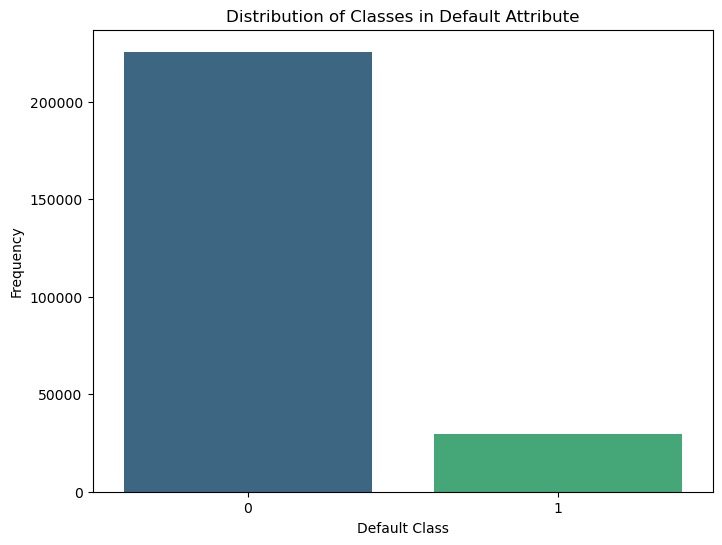

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')
plt.title('Distribution of Classes in Default Attribute')
plt.xlabel('Default Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate labels if needed
plt.show()

In [8]:
# Assuming 'data' is your DataFrame and you want to drop 'LoanID' and use 'Default' as the target variable
X = data.drop(['LoanID', 'Default'], axis=1)
y = data['Default']

X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,2,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,2,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,1,1
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,0,1


In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_train_smote, y_train_smote = oversample.fit_resample(X, y) 

In [11]:
# Splitting between train data into training and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.20)

In [12]:
# initializing all the model objects with hyperparameters 
model_1 = LogisticRegression(C = 1, penalty = "l2")
model_2 = xgb.XGBClassifier(colsample_bytree = 0.5, reg_alpha = 1, reg_lambda = 5)
model_3 = RandomForestClassifier(bootstrap= True, max_depth= 6, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 40)

In [13]:
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

In [14]:
# training all the model on the train dataset
final_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     min_samples_leaf=2,
                                                     n_estimators=40))])

In [15]:
# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report # evaluation metric
from termcolor import colored as cl # text customization
# Classificaton report
print(cl(classification_report(y_test, pred_final), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     45115
           1       0.85      0.81      0.83     45163

    accuracy                           0.83     90278
   macro avg       0.83      0.83      0.83     90278
weighted avg       0.83      0.83      0.83     90278



In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(final_model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

for metric_name in scoring:
    metric_result = results['test_' + metric_name]
    print(f"{metric_name}: {metric_result.mean():.2f} +/- {metric_result.std():.2f}")

C:\Users\opscu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\opscu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy: 0.83 +/- 0.08
precision_macro: 0.83 +/- 0.06
recall_macro: 0.83 +/- 0.08
f1_macro: 0.82 +/- 0.08


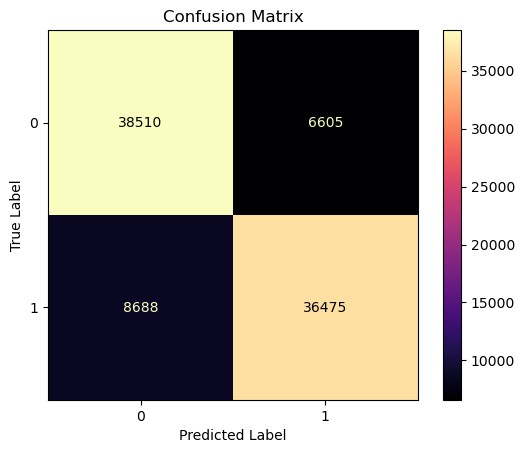

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from termcolor import colored as cl  # Text customization
# Calculate confusion matrix
cm = confusion_matrix(y_test, pred_final)

# Display the confusion matrix with a custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='magma')  # Using 'viridis' color map for better visual appeal
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

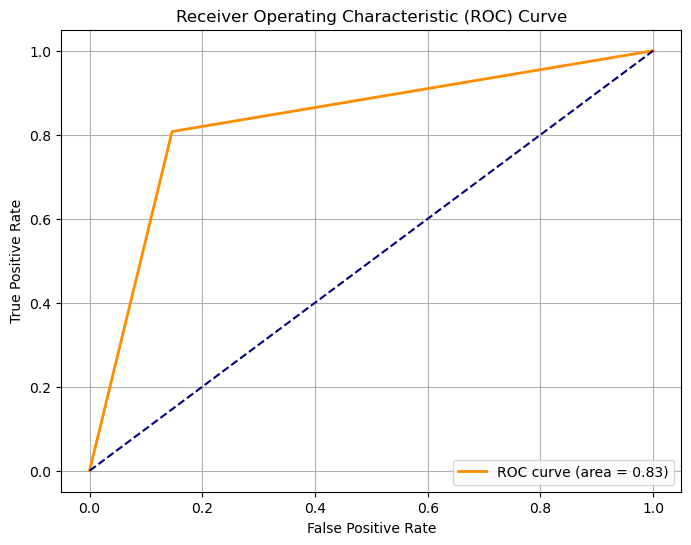

In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Calculate ROC curve data
y_probs = final_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Calculate the AUC

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()